# Visualizing pSFDI Data from Individual Datasets or Dataset Pairs
## Sam Potter
## Current: 3/13/19

## Path and Imports

In [1]:
import sys
import os

sys.path.extend(['C:\\Users\\potterst1\\Desktop\Repositories\BitBucket\dic',
                 'C:/Users/potterst1/Desktop/Repositories/BitBucket/dic'])
sys.path.extend(['/workspace/stpotter/git/bitbucket/dic'])
from dic import visualize
from dic import fileIO
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import patches
from matplotlib import rc
from dic import utilities

## Magics

In [2]:
%matplotlib inline
rc('text',usetex=True)

## Load data file(s)

### Specify file path(s)

In [3]:
tare_data_path = 'C:\\Users\\potterst1\\Box Sync\\Research\\Projects\\IGA DIC pSFDI\\Experimental Data\\2D pSFDI data\\2D Biax Testing\\3.8.19\\pSFDI Data\\4) Post PC Tare\\V_Green\\data_proc.mat'
s40_data_path = 'C:\\Users\\potterst1\\Box Sync\\Research\\Projects\\IGA DIC pSFDI\\Experimental Data\\2D pSFDI data\\2D Biax Testing\\3.8.19\\pSFDI Data\\Stepped Loading\\40 Steps Protocol\\S40\\V_Green\\data_proc.mat'

### Load file(s)

In [4]:
tare_data = fileIO.read_mat_file(tare_data_path)
s40_data = fileIO.read_mat_file(s40_data_path)

## Extract the necessary coefficients

In [5]:
tare_phi = tare_data['phi']
tare_a0 = tare_data['a0']
tare_a2 = tare_data['a2']
tare_a4 = tare_data['a4']

s40_phi = s40_data['phi']
s40_a0 = s40_data['a0']
s40_a2 = s40_data['a2']
s40_a4 = s40_data['a4']

# Add 180 to phi
tare_phi = tare_phi + 180 * np.ones(tare_phi.shape)
s40_phi = s40_phi + 180 * np.ones(s40_phi.shape)

## Visualize the PD images

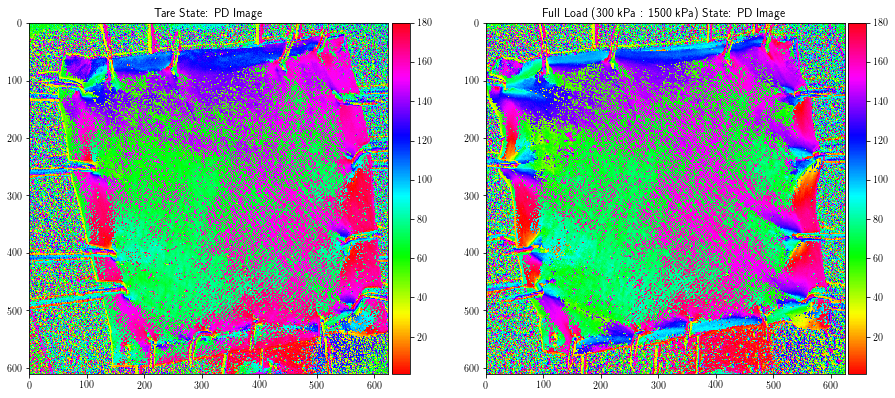

In [6]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
im0 = ax0.imshow(tare_phi, cmap='hsv')
divider = make_axes_locatable(ax0)
cax0 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax0)
ax0.set_title('Tare State: PD Image')

im1 = ax1.imshow(s40_phi, cmap='hsv')
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax1)
ax1.set_title('Full Load (300 kPa : 1500 kPa) State: PD Image');

## Visualize the a0 images

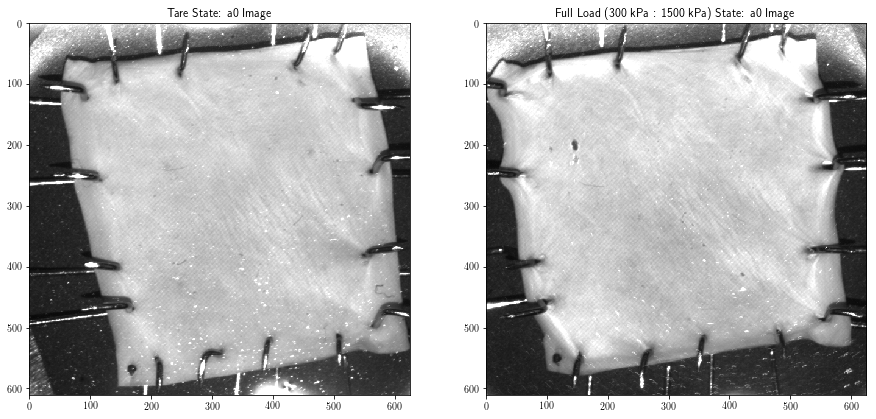

In [7]:
colorlimits = (0, 1)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
tareim = ax0.imshow(tare_a0, cmap='gray')
tareim.set_clim(colorlimits)
ax0.set_title('Tare State: a0 Image')

s40im = ax1.imshow(s40_a0, cmap='gray')
s40im.set_clim(colorlimits)
ax1.set_title('Full Load (300 kPa : 1500 kPa) State: a0 Image');

## Visualize the a2 images

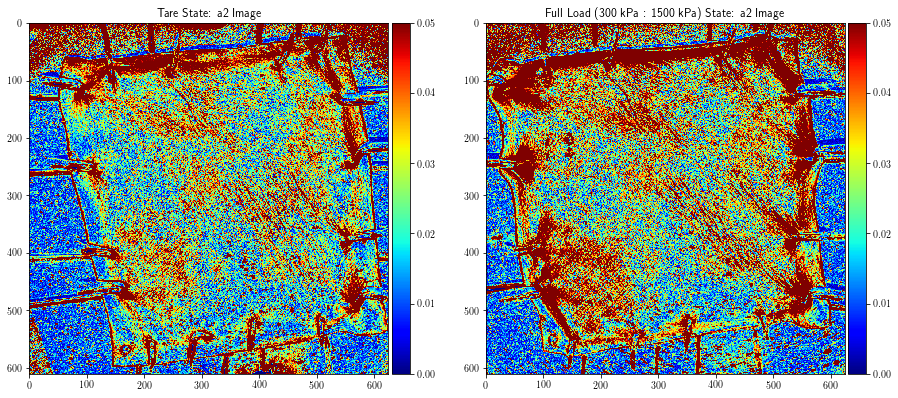

In [8]:
colorlimits = (0, 0.05)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
im0 = ax0.imshow(tare_a2, cmap='jet')
divider = make_axes_locatable(ax0)
cax0 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax0)
im0.set_clim(colorlimits)
ax0.set_title('Tare State: a2 Image')

im1 = ax1.imshow(s40_a2, cmap='jet')
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax1)
im1.set_clim(colorlimits)
ax1.set_title('Full Load (300 kPa : 1500 kPa) State: a2 Image');

## Visualize the a4 images

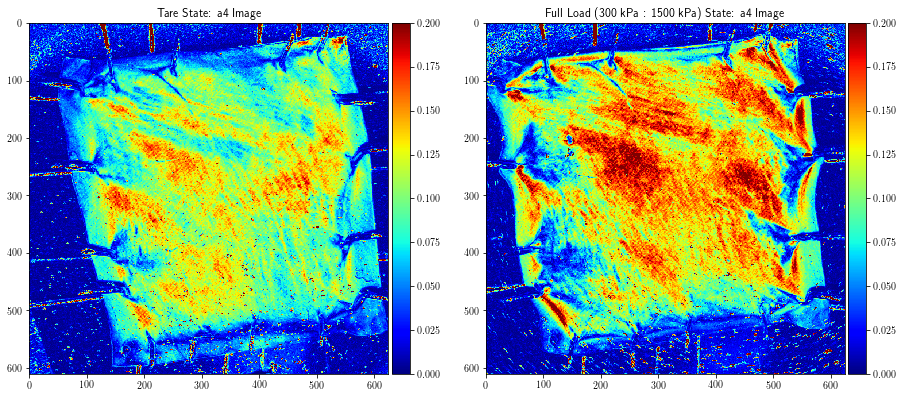

In [9]:
colorlimits = (0, 0.2)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
im0 = ax0.imshow(tare_a4, cmap='jet')
divider = make_axes_locatable(ax0)
cax0 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax0)
im0.set_clim(colorlimits)
ax0.set_title('Tare State: a4 Image')

im1 = ax1.imshow(s40_a4, cmap='jet')
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax1)
im1.set_clim(colorlimits)
ax1.set_title('Full Load (300 kPa : 1500 kPa) State: a4 Image');

## Examine changes to I $(\theta)$

### Specify and Illustrate ROI in each image

In [75]:
# Scope appropriate size of ROI in refer and def images
ref_pixel_size = 5
ref_pixel_start = 300

# Experimental F
F = np.array([[1.06, 0],
             [0, 1.06]])

proposed_def_start = F @ np.array([ref_pixel_start, ref_pixel_start])

print('Possible start in def')
print(proposed_def_start)

proposed_def_step = F[0, 0] * ref_pixel_size
print('Possible def step size')
print(proposed_def_step)

# Specify
def_pixel_start = 318
def_pixel_size = 6

Possible start in def
[318. 318.]
Possible def step size
5.300000000000001


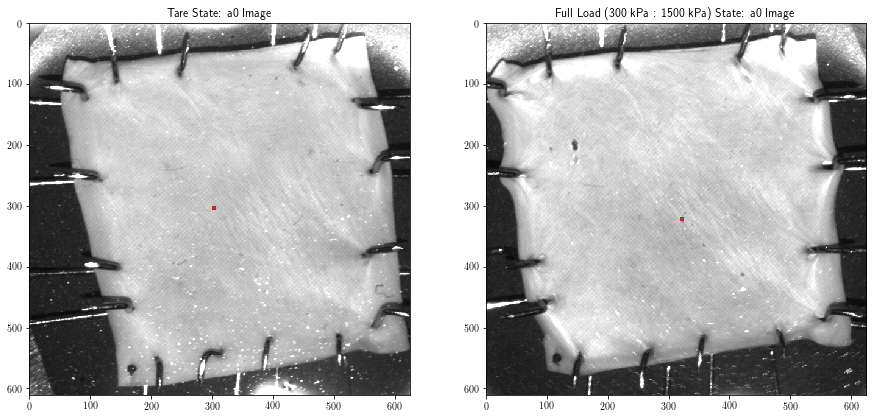

In [76]:
# Visualize ROI
colorlimits = (0, 1)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
tareim = ax0.imshow(tare_a0, cmap='gray')
tareim.set_clim(colorlimits)
roi0 = patches.Rectangle((ref_pixel_start, ref_pixel_start), ref_pixel_size, ref_pixel_size, linewidth='1', edgecolor='r', facecolor=None)
ax0.add_patch(roi0)
ax0.set_title('Tare State: a0 Image')

s40im = ax1.imshow(s40_a0, cmap='gray')
s40im.set_clim(colorlimits)
roi1 = patches.Rectangle((def_pixel_start, def_pixel_start), def_pixel_size, def_pixel_size, linewidth='1', edgecolor='r', facecolor=None)
ax1.add_patch(roi1)
ax1.set_title('Full Load (300 kPa : 1500 kPa) State: a0 Image');

### Compute the average values of a0, a2, and a4 from these ROIs

In [77]:
# Tare load
tare_phi_roi = tare_phi[ref_pixel_start:ref_pixel_start + ref_pixel_size, ref_pixel_start:ref_pixel_start + ref_pixel_size]
tare_a0_roi = tare_a0[ref_pixel_start:ref_pixel_start + ref_pixel_size, ref_pixel_start:ref_pixel_start + ref_pixel_size]
tare_a2_roi = tare_a2[ref_pixel_start:ref_pixel_start + ref_pixel_size, ref_pixel_start:ref_pixel_start + ref_pixel_size]
tare_a4_roi = tare_a4[ref_pixel_start:ref_pixel_start + ref_pixel_size, ref_pixel_start:ref_pixel_start + ref_pixel_size]

In [78]:
# Max load
s40_phi_roi = s40_phi[ref_pixel_start:ref_pixel_start + def_pixel_size, ref_pixel_start:ref_pixel_start + def_pixel_size]
s40_a0_roi = s40_a0[ref_pixel_start:ref_pixel_start + def_pixel_size, ref_pixel_start:ref_pixel_start + def_pixel_size]
s40_a2_roi = s40_a2[ref_pixel_start:ref_pixel_start + def_pixel_size, ref_pixel_start:ref_pixel_start + def_pixel_size]
s40_a4_roi = s40_a4[ref_pixel_start:ref_pixel_start + def_pixel_size, ref_pixel_start:ref_pixel_start + def_pixel_size]

In [79]:
# Compute means
tare_phi_mean = np.mean(tare_phi_roi)
tare_a0_mean = np.mean(tare_a0_roi)
tare_a2_mean = np.mean(tare_a2_roi)
tare_a4_mean = np.mean(tare_a4_roi)

s40_phi_mean = np.mean(s40_phi_roi)
s40_a0_mean = np.mean(s40_a0_roi)
s40_a2_mean = np.mean(s40_a2_roi)
s40_a4_mean = np.mean(s40_a4_roi)

### Compute the resulting double cosine series

In [80]:
class Intensity:
    
    def __init__(self, phi, a0, a2, a4):
        self._phi = np.deg2rad(phi)
        self._a0 = a0
        self._a2 = a2
        self._a4 = a4
        self._points = None
        
    def evaluate(self, numpts):
        theta = np.linspace(0, np.pi, numpts)
        self._points = self._a0 + self._a2 * np.cos(2 *(theta - self._phi)) + self._a4 * np.cos(4 * (theta - self._phi))
        

In [81]:
numpts = 100

In [82]:
TareIntensity = Intensity(tare_phi_mean + 4, tare_a0_mean, tare_a2_mean, tare_a4_mean)
TareIntensity.evaluate(numpts)
tare_points = TareIntensity._points

In [83]:
s40Intensity = Intensity(s40_phi_mean, s40_a0_mean, s40_a2_mean, s40_a4_mean)
s40Intensity.evaluate(numpts)
s40_points = s40Intensity._points

In [84]:
tare_points_normalized = utilities.normalize_1d(tare_points)
s40_points_normalized = utilities.normalize_1d(s40_points)

### Plot these cosine series together

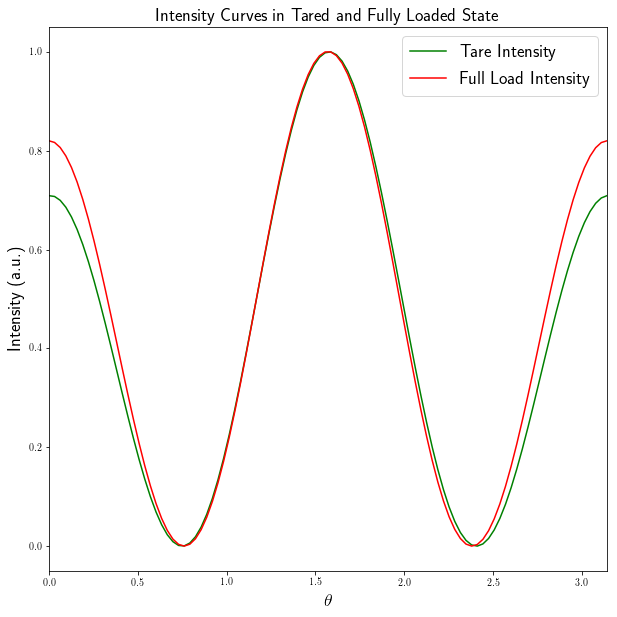

In [85]:
theta = np.linspace(0, np.pi, numpts)

fig = plt.figure(figsize=(10, 10))
plt.plot(theta, tare_points_normalized, color='g', label='Tare Intensity');
plt.plot(theta, s40_points_normalized, color='r', label='Full Load Intensity');
plt.legend(prop={'size': 18});
plt.xlabel(r'$\theta$', fontsize=18);
plt.ylabel('Intensity (a.u.)', fontsize=18);
plt.title('Intensity Curves in Tared and Fully Loaded State', fontsize=18);
plt.autoscale(enable=True, axis='x', tight=True)